In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('household_power_consumption.txt',
                 sep=';',
                 na_values='?',
                 low_memory=False)

In [3]:
df.head()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    float64
 3   Global_reactive_power  float64
 4   Voltage                float64
 5   Global_intensity       float64
 6   Sub_metering_1         float64
 7   Sub_metering_2         float64
 8   Sub_metering_3         float64
dtypes: float64(7), object(2)
memory usage: 142.5+ MB


Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [4]:
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'],
                                format='%d/%m/%Y %H:%M:%S')
df = df.drop(columns=['Date', 'Time'])
df = df.set_index('Datetime')
df = df.sort_index()

In [5]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [6]:
df = df.apply(pd.to_numeric, errors='coerce')

In [7]:
df = df.dropna()

In [8]:
df.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


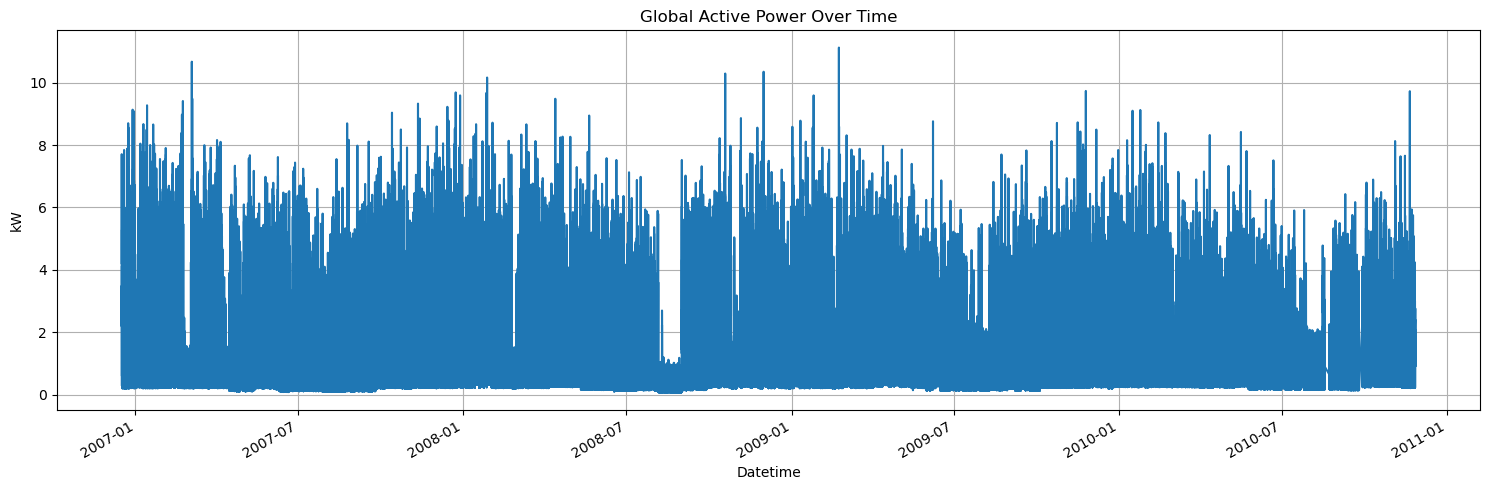

In [9]:
plt.figure(figsize=(15,5))
df['Global_active_power'].plot()
plt.title('Global Active Power Over Time')
plt.ylabel('kW')
plt.xlabel('Datetime')
plt.grid(True)
plt.tight_layout()
plt.show()

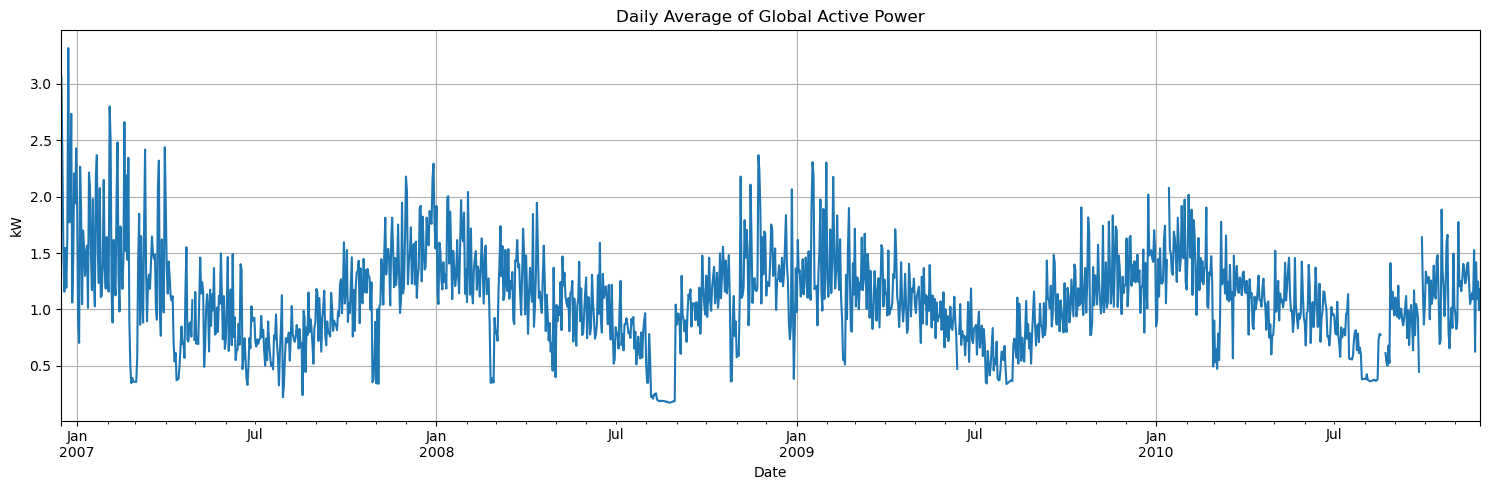

In [10]:
daily_avg = df['Global_active_power'].resample('D').mean()

plt.figure(figsize=(15,5))
daily_avg.plot()
plt.title('Daily Average of Global Active Power')
plt.ylabel('kW')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()

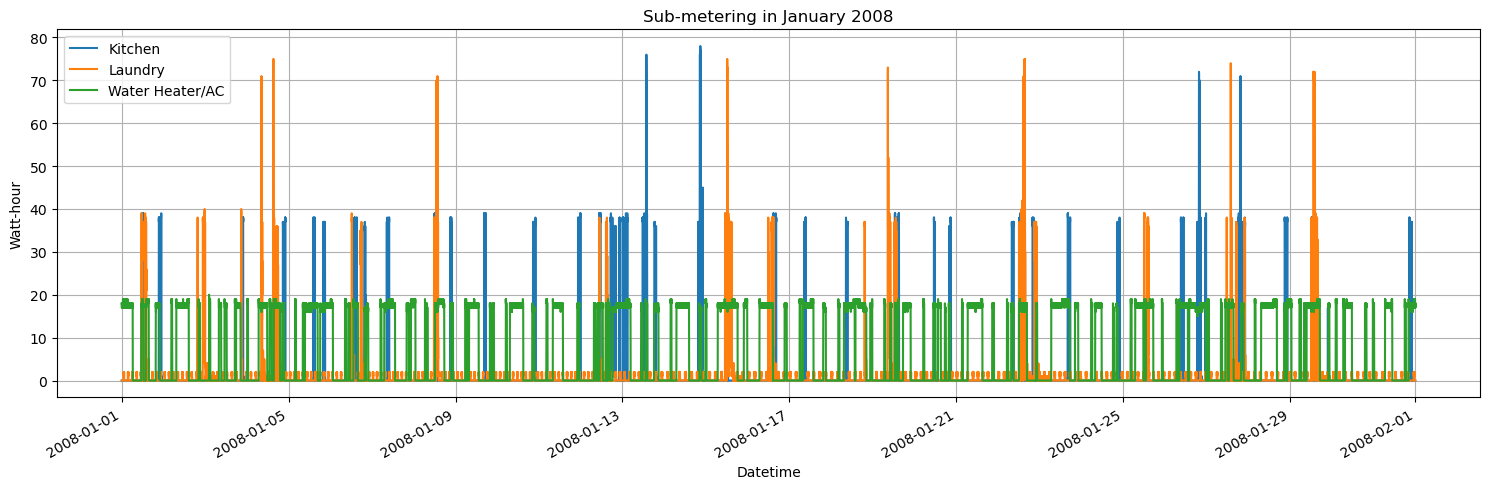

In [11]:
subset = df.loc['2008-01'].copy()

plt.figure(figsize=(15,5))
subset['Sub_metering_1'].plot(label='Kitchen')
subset['Sub_metering_2'].plot(label='Laundry')
subset['Sub_metering_3'].plot(label='Water Heater/AC')
plt.title('Sub-metering in January 2008')
plt.legend()
plt.ylabel('Watt-hour')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
df_clean = df.dropna()

In [26]:
y = df_clean['Global_active_power']

X = df_clean.drop(columns=['Global_active_power'])

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import numpy as np

In [46]:
y_pred = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2 score: {r2:.4f}")

MAE: 0.0258
RMSE: 0.0404
R2 score: 0.9986


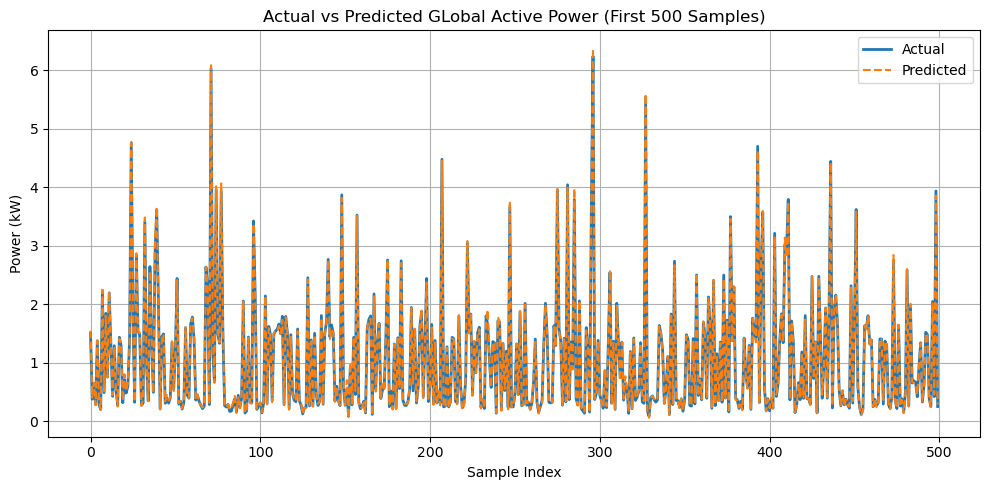

In [48]:
plt.figure(figsize=(10,5))
plt.plot(y_test.values[:500], label='Actual', linewidth=2)
plt.plot(y_pred[:500], label='Predicted', linestyle='--')
plt.title('Actual vs Predicted GLobal Active Power (First 500 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Power (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:
daily_df = df.resample('D').mean().dropna()

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(daily_df)

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

daily_df['Cluster'] = clusters

C:\Users\Azif\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


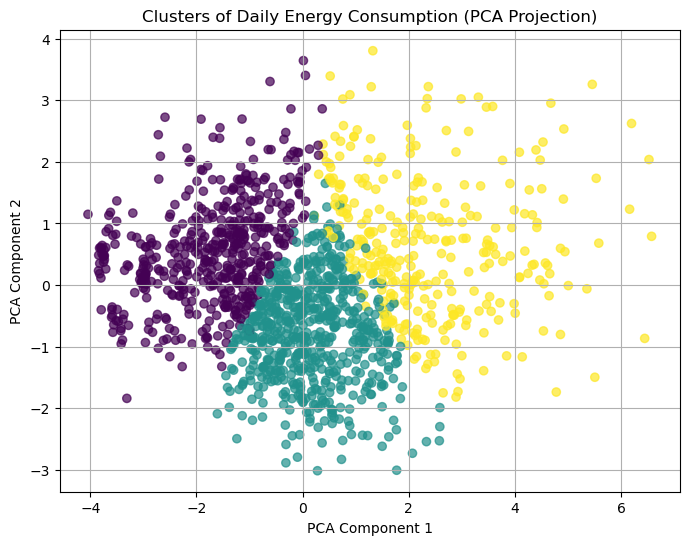

In [64]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=clusters, cmap= 'viridis', alpha=0.7)
plt.title('Clusters of Daily Energy Consumption (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()

In [66]:
cluster_summary = daily_df.groupby('Cluster').mean()
print(cluster_summary)

         Global_active_power  Global_reactive_power     Voltage  \
Cluster                                                           
0                   0.682914               0.131077  240.066084   
1                   1.163739               0.108729  241.588607   
2                   1.590304               0.142208  240.557736   

         Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
Cluster                                                                    
0                2.960187        0.582516        0.750531        4.067263  
1                4.890303        0.934163        0.876083        7.488145  
2                6.725976        2.340877        2.988481        8.101433  


<Axes: title={'center': 'Daily Average Global Active Power'}, xlabel='Datetime'>

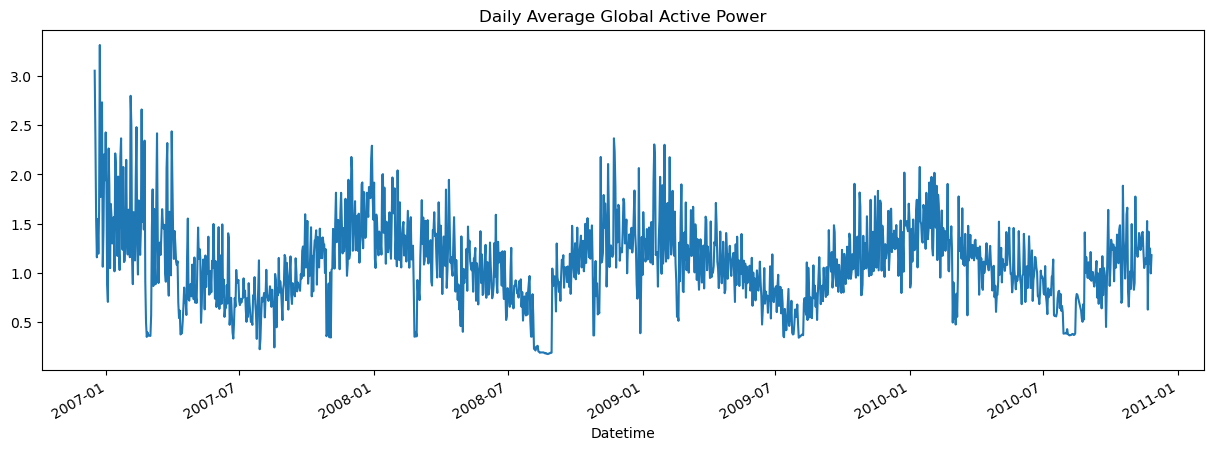

In [68]:
daily_df = df['Global_active_power'].resample('D').mean()

daily_df = daily_df.dropna()

daily_df.plot(figsize=(15,5), title='Daily Average Global Active Power')

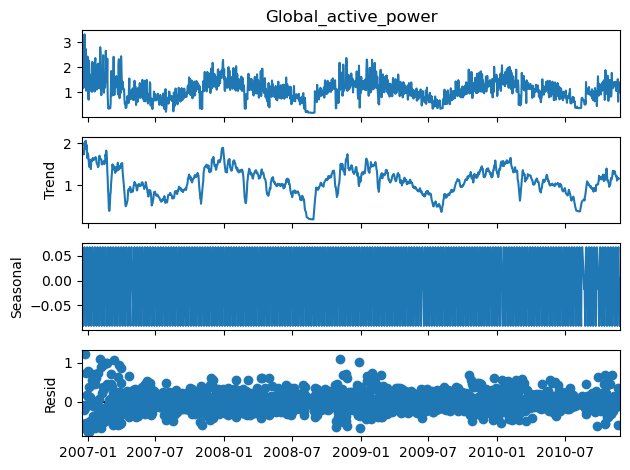

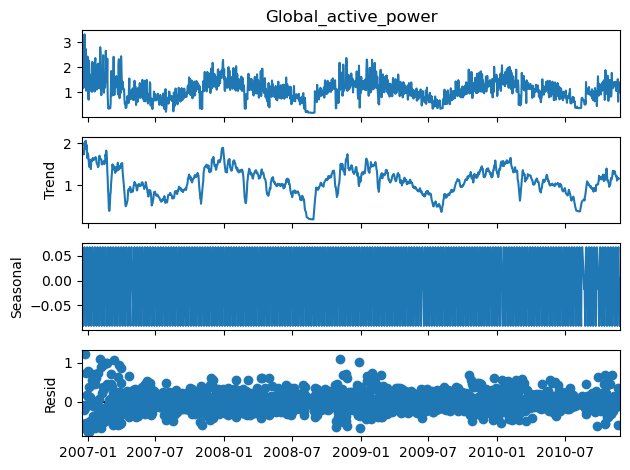

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(daily_df, model='additive', period=7)
decomposition.plot()

In [76]:
train = daily_df[:-180]
test = daily_df[-180:]

In [78]:
from statsmodels.tsa.arima.model import ARIMA

In [86]:
train = train.asfreq('D')

In [88]:
model = ARIMA(train, order=(5,1,2))
fitted_model = model.fit()

C:\Users\Azif\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Azif\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [90]:
forecast = fitted_model.forecast(steps=len(test))

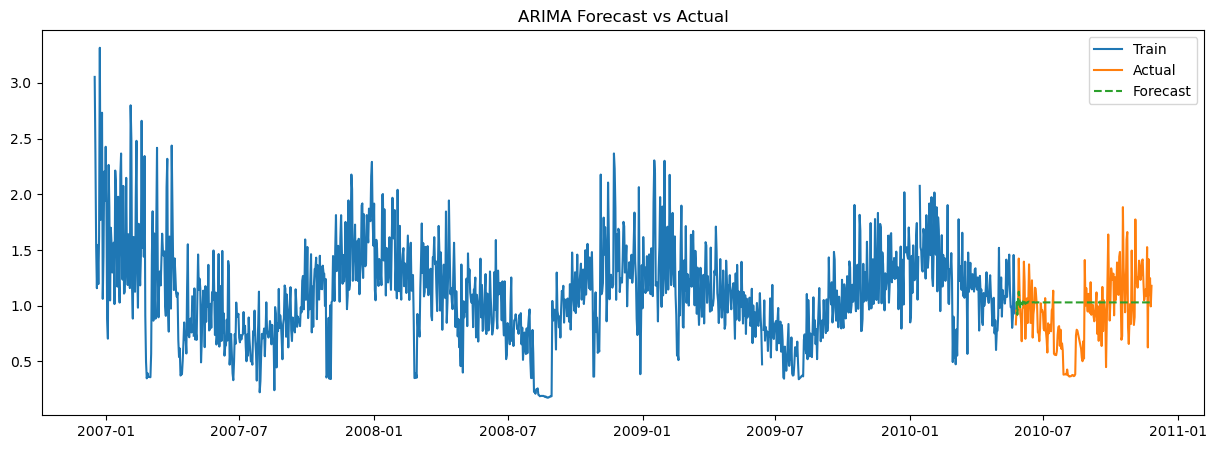

In [94]:
plt.figure(figsize=(15,5))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('ARIMA Forecast vs Actual')
plt.show()